In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from exponential_mechanism import *
from simpleinfotheory import *
from normalize_error_matrix import *
from rappor_mechanism import *

import matplotlib as mpl
import matplotlib.lines as mlines

mpl.rcParams.update({'font.size': 14})

## Generate Synthetic Datasets

In [68]:
from alphabet import *

NUM_ATTRIBUTES = 2
NUM_STATES = [3, 3]
DATASET_SIZE = 10000

priority_dict = {} # {'0': 2, '1': 0.5}

TOTAL_STATES = 1
alphabet_dict = {}
for i in range(NUM_ATTRIBUTES):
    TOTAL_STATES *= NUM_STATES[i]
    alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
ATTRIBUTE_LIST = list(alphabet_dict.keys())
# random_dist = np.array([random.randint(1, 5000) for i in range(TOTAL_STATES)])
# random_dist = random_dist/np.sum(random_dist)
random_dist = [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34] # [0.2, 0.11, 0.01, 0.01, 0.20, 0.11, 0.01, 0.11, 0.24] # [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]
# random_dist = [0.25, 0.25, 0.25, 0.25] # [0.5, 0.025, 0.025, 0.45]

print("Alphabet ", ALL_ALPHABET)
print("ATTRIBUTE_LIST ", ATTRIBUTE_LIST)

synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

uniform_synthetic_dataset = synthetic_dataset_constructor.gen_uniform()



Alphabet  [[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
ATTRIBUTE_LIST  ['0', '1']


## Claculate Error Matrix

In [69]:
# alphabet_dict = {}
# for i in range(len(ALL_ALPHABET)):
#     alphabet_dict[str(ALL_ALPHABET[i])] = i
# print(alphabet_dict)
# normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict)
# err_matrix = normalize_error_matrix.normalized_error_matrix
# sns.heatmap(err_matrix)
# plt.show()

## Calculate Mutual Information

### Pair-wise information leakage of A: I(A;A')

In [70]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

### Total information leakage of A: I(A;A',B')

In [71]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return  mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)
    # return  mutual_info_pair(A, B_prime) - conditional_mutual_info(A, B_prime, A_prime)

In [72]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    # mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

## Benchmark Optimal Mechanism

In [73]:
EPS_ARRAY = np.arange(100)*0.15

### Correlated Distribution

{'[0 0]': 0, '[0 1]': 1, '[0 2]': 2, '[1 0]': 3, '[1 1]': 4, '[1 2]': 5, '[2 0]': 6, '[2 1]': 7, '[2 2]': 8}


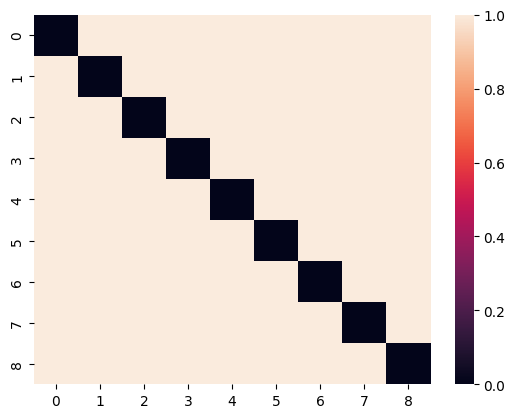

0.0
l2_error  1.3136150317190498
0.15
l2_error  1.309847522913765
0.3
l2_error  1.3094969768843643
0.44999999999999996
l2_error  1.322841540419582
0.6
l2_error  1.3253949224794337
0.75
l2_error  1.3740750159524626
0.8999999999999999


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  1.4105490237177636
1.05
l2_error  1.423110732850978
1.2
l2_error  1.445937924175733
1.3499999999999999
l2_error  1.4760074702014652
1.5
l2_error  1.5386897640662893
1.65
l2_error  1.5634633122593833
1.7999999999999998
l2_error  1.4266218604937
1.95
l2_error  1.5891613109656977
2.1
l2_error  1.466959230396207
2.25
l2_error  1.612040479736774
2.4
l2_error  1.485083205210432
2.55
l2_error  1.6969812351401803
2.6999999999999997
l2_error  1.757828948336949
2.85
l2_error  1.631500400965035
3.0
l2_error  1.6976196343485588
3.15
l2_error  1.7642044863325121
3.3
l2_error  1.9042055681269534
3.4499999999999997
l2_error  1.934626411098832
3.5999999999999996
l2_error  1.789712198795789
3.75
l2_error  2.01732590934215
3.9
l2_error  2.016166910284753
4.05
l2_error  2.0080760966515347
4.2
l2_error  1.7739675892007036
4.35
l2_error  1.6670146505499943
4.5
l2_error  2.067889518647762
4.6499999999999995
l2_error  0.7796237874432922
4.8
l2_error  0.3944877880925921
4.95
l2_error  0.095300796870

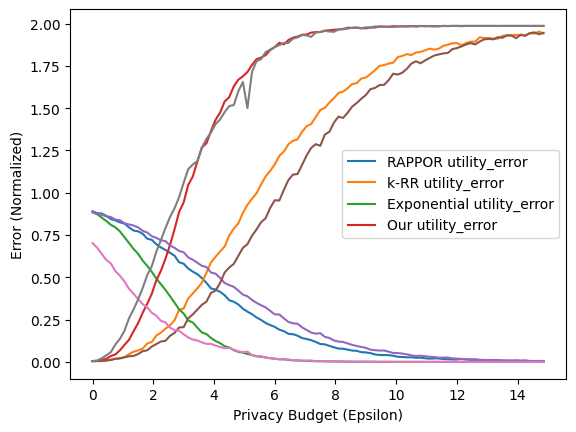

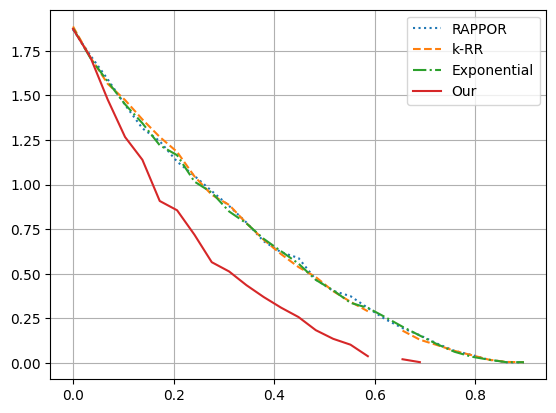

{'[0 0]': 0, '[0 1]': 1, '[0 2]': 2, '[1 0]': 3, '[1 1]': 4, '[1 2]': 5, '[2 0]': 6, '[2 1]': 7, '[2 2]': 8}


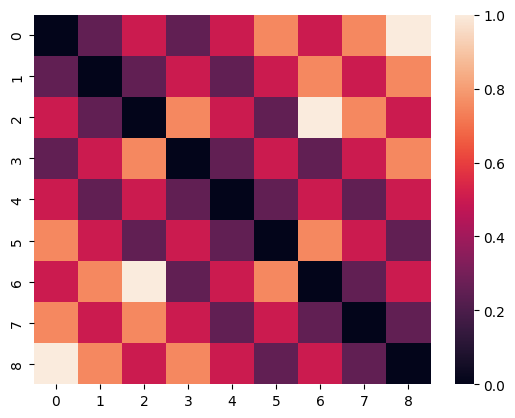

0.0
l2_error  1.2913611142918784
0.15
l2_error  1.3170618896933746
0.3
l2_error  1.3324333783133697
0.44999999999999996
l2_error  1.3560840042031281
0.6
l2_error  1.39192470881148
0.75
l2_error  1.4511076234898386
0.8999999999999999
l2_error  1.5044349475275098
1.05
l2_error  1.5716268297834075
1.2
l2_error  1.6420257965177365
1.3499999999999999
l2_error  1.6718182034966669
1.5
l2_error  1.728486055383162
1.65
l2_error  1.7127856683741776
1.7999999999999998
l2_error  1.7477211937523751
1.95
l2_error  1.9712352091515715
2.1


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  2.0196812905777057
2.25
l2_error  2.1377795333997094
2.4
l2_error  2.0718949081342726
2.55
l2_error  2.1384095102511105
2.6999999999999997
l2_error  2.245244506359434
2.85
l2_error  2.2349472038449116
3.0
l2_error  2.246959268377499
3.15
l2_error  2.009624759544858
3.3
l2_error  1.9150590523177926
3.4499999999999997
l2_error  1.9211554900412655
3.5999999999999996
l2_error  1.9587994017036132
3.75
l2_error  1.9170742305242832
3.9
l2_error  1.924028783530071
4.05
l2_error  1.9439982831933031
4.2
l2_error  1.8844843277237868
4.35
l2_error  1.8898248292046382
4.5
l2_error  1.8064155821535997
4.6499999999999995
l2_error  1.842627458380618
4.8
l2_error  1.893140657756278
4.95
l2_error  1.9232244479772482
5.1
l2_error  1.9143258407828416
5.25
l2_error  0.6558516817574216
5.3999999999999995
l2_error  0.3642213972854654
5.55
l2_error  1.0773082203827926
5.7
l2_error  1.0887344836807387
5.85
l2_error  2.064624797272485
6.0
l2_error  0.5789668094725235
6.1499999999999995
l2_error  2.201

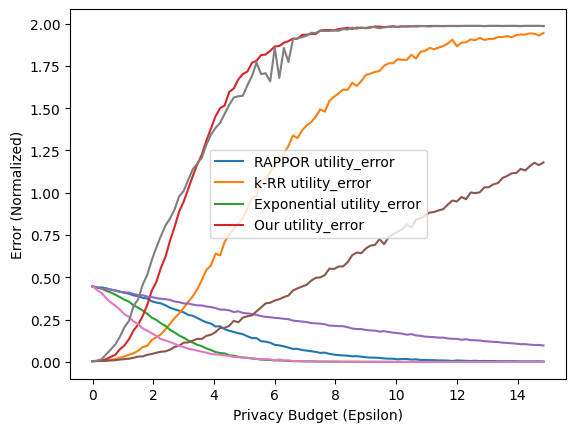

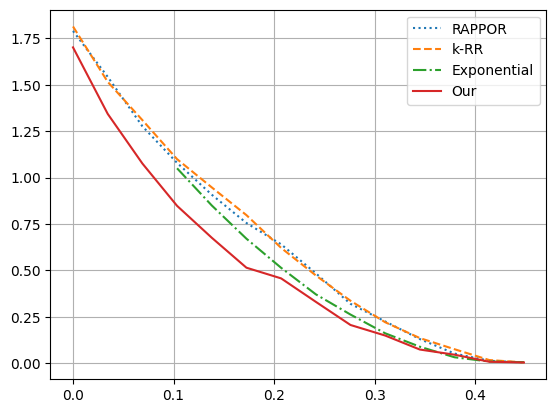

{'[0 0]': 0, '[0 1]': 1, '[0 2]': 2, '[1 0]': 3, '[1 1]': 4, '[1 2]': 5, '[2 0]': 6, '[2 1]': 7, '[2 2]': 8}


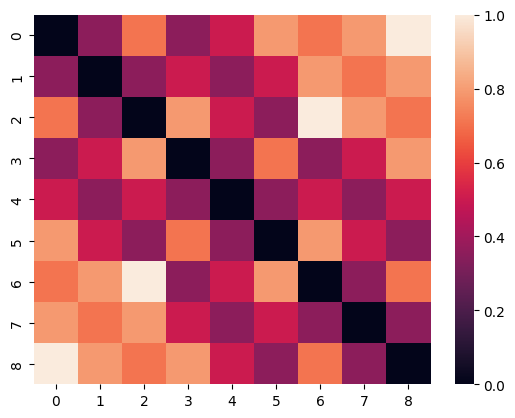

0.0
l2_error  1.3108776749708069
0.15
l2_error  1.3167381414857557
0.3
l2_error  1.3324197504289192
0.44999999999999996
l2_error  1.3604134953600695
0.6
l2_error  1.392769953208685
0.75
l2_error  1.4365440982444648
0.8999999999999999
l2_error  1.4954020904823344
1.05
l2_error  1.5386407472597805
1.2
l2_error  1.6083479480707934
1.3499999999999999
l2_error  1.6605528199478834
1.5
l2_error  1.7203280232921256
1.65
l2_error  1.8012954907934957
1.7999999999999998
l2_error  1.886403519536482
1.95
l2_error  1.9708771256124418
2.1
l2_error  2.0742686140693634
2.25


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  2.1278909250183293
2.4
l2_error  2.113676761165357
2.55
l2_error  2.0243227470283474
2.6999999999999997
l2_error  2.0108880929202324
2.85
l2_error  2.0304266883940296
3.0
l2_error  2.069919288768534
3.15
l2_error  2.143094520830789
3.3
l2_error  1.9524323834790747
3.4499999999999997
l2_error  2.10109826233939
3.5999999999999996
l2_error  2.019909536411861
3.75
l2_error  1.8798161210771793
3.9
l2_error  1.9244057878043521
4.05
l2_error  2.0038914547154927
4.2
l2_error  2.121307119528594
4.35
l2_error  1.9556209254808352
4.5
l2_error  1.957718144831657
4.6499999999999995
l2_error  1.9246642614854685
4.8
l2_error  2.016226827333315
4.95
l2_error  1.923659833110612
5.1
l2_error  1.0271641721603917
5.25
l2_error  1.023380219444208
5.3999999999999995
l2_error  0.6569820301651597
5.55
l2_error  0.04510914386940532
5.7
l2_error  0.9868084484050866
5.85
l2_error  0.35093426709440156
6.0
l2_error  0.00010105095822793772


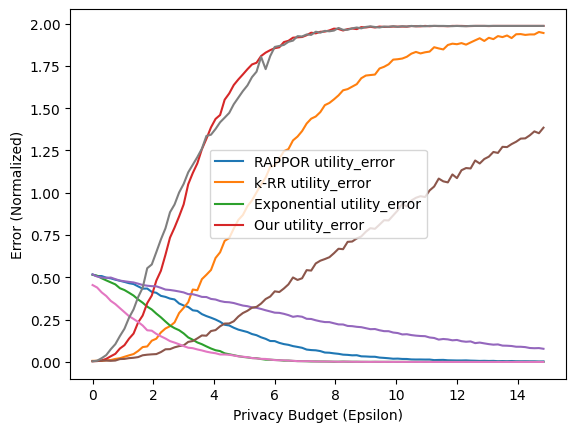

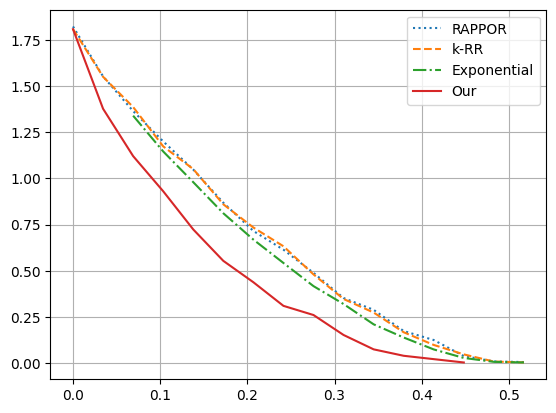

In [74]:
utility_error_function = ["0_1", "l1", "l2"]
line_styles = {"RAPPOR": ":", "k-RR": "--", "Exponential": "-.", "Our": "-"}
    
for util_err in utility_error_function:
    alphabet_dict = {}
    for i in range(len(ALL_ALPHABET)):
        alphabet_dict[str(ALL_ALPHABET[i])] = i
    print(alphabet_dict)
    normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict, err_type=util_err)
    err_matrix = normalize_error_matrix.normalized_error_matrix
    sns.heatmap(err_matrix)
    plt.show()

    exponential_mechanism_without_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)

    exponential_mechanism_with_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=False)

    random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

    optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                    TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)

    rappor_mechanism = Rappor_mechanism(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, prob_f=0.5, prob_p=0.25, prob_q=0.75, collection_count = 20)
    # mechanisms_dict = {"Exp. mechanism without prior": exponential_mechanism_without_prior, "Exp. mechanism with prior": exponential_mechanism_with_prior, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
    # mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
    mechanisms_dict = {"RAPPOR": rappor_mechanism, "k-RR": random_response_mechanism, "Exponential": exponential_mechanism_without_prior, "Our": optimal_random_response_mechanism}

    error_dict = {}
    mi_dict = {}
    total_mi_dict = {}

    for key in list(mechanisms_dict.keys()):
        error_dict[key] = []
        mi_dict[key] = []
        total_mi_dict[key] = []

    for eps in EPS_ARRAY:
        # print(eps)
        for mechanism in list(mechanisms_dict.keys()):
            __tot_error = 0
            __perturbed_value_list = []
            for entry in correlated_synthetic_dataset:
                # entry = entry_np_value[0]
                if mechanism == "RAPPOR":
                    __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps, prob_f=eps/10, is_eps=True)[0])
                else:
                    __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])
                # print(entry,__perturbed_value_list[-1])
                __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
                __tot_error += __error
            error_dict[mechanism].append(__tot_error/len(uniform_synthetic_dataset))
            mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
            # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
            # mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))

            # if mechanism == "Optimal k-RR":
            #     optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
                
                # posterior_prob_distribution = np.zeros(TOTAL_STATES)
                # posterior_joint_prob = np.zeros((TOTAL_STATES, TOTAL_STATES))
                # for i in range(TOTAL_STATES):
                #     posterior_joint_prob[:,i] = np.reshape(optimal_mechanism[:,i] * np.array(random_dist), (4,))
                #     posterior_prob_distribution[i] = np.sum(optimal_mechanism[:,i] * np.array(random_dist))
                # print("posterior_prob_distribution ", posterior_prob_distribution)
                # print("Distance ", np.linalg.norm((random_dist-posterior_prob_distribution), 2))
                # sns.heatmap(optimal_mechanism)
                # plt.show()
    lagends = []
    for mechanism in list(mechanisms_dict.keys()):
        lagends.append(mechanism + " utility_error")
        plt.plot(EPS_ARRAY, error_dict[mechanism])
        # lagends.append(mechanism + " info_leakage")
        # plt.plot(EPS_ARRAY, mi_dict[mechanism])
        # lagends.append(mechanism + " total_info_leakage")
        # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
        # for mi_ in range(len(mi_dict[mechanism][0])):
        plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism]))
        #     lagends.append(f"{mechanism}")
            # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

    plt.legend(lagends)
    plt.xlabel("Privacy Budget (Epsilon)")
    plt.ylabel("Error (Normalized)")
    # plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
    plt.show()

    utility_error = np.arange(26)
    
    utility_error = utility_error/np.max(utility_error)

    tolerance = (utility_error[1] - utility_error[0])/2

    info_dict = {}

    for mechanism in list(mechanisms_dict.keys()):
        info_dict[mechanism] = []
        for i in utility_error:
            info_dict[mechanism].append(np.nan)

    for index_1, i in enumerate(utility_error):
        for mechanism in list(mechanisms_dict.keys()):
            for index_, j in enumerate(error_dict[mechanism]):
                if abs(i-j) < tolerance:
                    info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                    break
    fig = plt.figure()
    lagends = []
    for mechanism in list(mechanisms_dict.keys()):
        lagends.append(mechanism)
        plt.plot(utility_error, info_dict[mechanism], linestyle=line_styles[mechanism])

    plt.legend(lagends)
    plt.grid(visible=True)
    plt.show()
    fig.savefig(f"{util_err}.pdf", bbox_inches='tight')


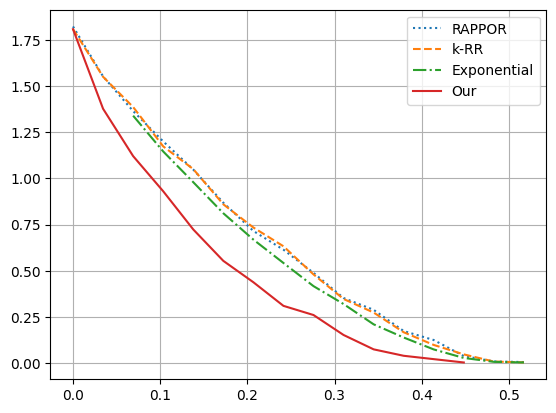

In [75]:
utility_error = np.arange(30)
    
utility_error = utility_error/np.max(utility_error)

tolerance = (utility_error[1] - utility_error[0])/2

info_dict = {}

for mechanism in list(mechanisms_dict.keys()):
    info_dict[mechanism] = []
    for i in utility_error:
        info_dict[mechanism].append(np.nan)

for index_1, i in enumerate(utility_error):
    for mechanism in list(mechanisms_dict.keys()):
        for index_, j in enumerate(error_dict[mechanism]):
            if abs(i-j) < tolerance:
                info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                break
fig = plt.figure()
lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism)
    plt.plot(utility_error, info_dict[mechanism], linestyle=line_styles[mechanism])

plt.legend(lagends)
plt.grid(visible=True)
plt.show()
fig.savefig(f"{util_err}.pdf", bbox_inches='tight')


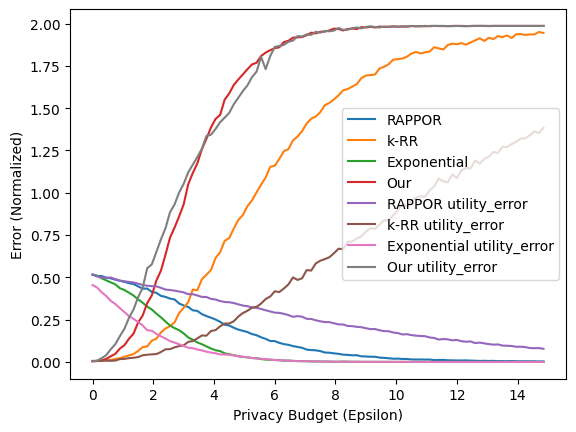

In [76]:
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism]))
    #     lagends.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

In [77]:
error_dict

{'RAPPOR': [0.5168217081210978,
  0.507798706940832,
  0.5074181313242576,
  0.4982082645829868,
  0.49386624381724853,
  0.4860029828220678,
  0.47958797113200163,
  0.472991563382977,
  0.4653406675236543,
  0.4603567273392995,
  0.44644578617183334,
  0.4331173341985883,
  0.4336824871778471,
  0.41402059380374984,
  0.40860133050027186,
  0.39045496739049795,
  0.38445625079082313,
  0.3743017291587892,
  0.36924574036136093,
  0.34537431397349516,
  0.3335954744592465,
  0.32466494276079766,
  0.305112206567523,
  0.3015452875796957,
  0.2825451727217012,
  0.270907721262065,
  0.26128672922769836,
  0.25052551428566755,
  0.2373285876018215,
  0.2196467235271757,
  0.215540667405375,
  0.2019975714923147,
  0.1909588805504809,
  0.18374916969096391,
  0.1766501098289756,
  0.16484199124878676,
  0.15792067090522677,
  0.14545137357899984,
  0.13643034896413564,
  0.12367110322593591,
  0.12300429981722755,
  0.11258048591671199,
  0.10536616075127622,
  0.10099705260842516,
  0.0

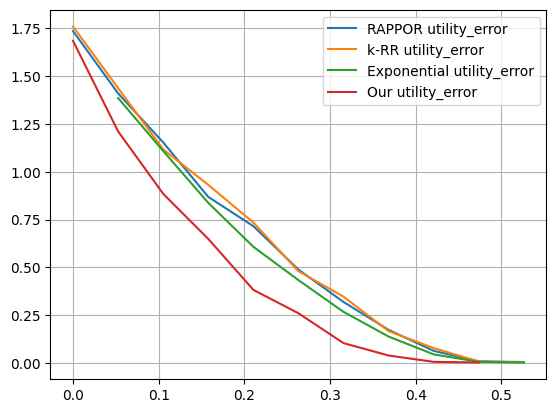

In [78]:
utility_error = np.arange(20)
utility_error = utility_error/np.max(utility_error)

tolerance = (utility_error[1] - utility_error[0])/2

info_dict = {}

for mechanism in list(mechanisms_dict.keys()):
    info_dict[mechanism] = []
    for i in utility_error:
        info_dict[mechanism].append(np.nan)

for index_1, i in enumerate(utility_error):
    for mechanism in list(mechanisms_dict.keys()):
        for index_, j in enumerate(error_dict[mechanism]):
            if abs(i-j) < tolerance:
                info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                break

lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(utility_error, info_dict[mechanism])

plt.legend(lagends)
plt.grid(visible=True)
plt.show()


In [79]:
info_dict

{'RAPPOR': [1.7344489234386802,
  1.4089438302195338,
  1.1530524770177055,
  0.868444609223809,
  0.7155669756825764,
  0.4890478193200103,
  0.3197498205355105,
  0.1741314277675281,
  0.06470286213868093,
  0.009794872688027922,
  0.006331913925006205,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'k-RR': [1.758301186713799,
  1.4363227105231071,
  1.1164401621040518,
  0.9312635242558378,
  0.73439301355286,
  0.48056729167336343,
  0.3476096861688083,
  0.16758967361655053,
  0.0792036446739326,
  0.009060551372563452,
  0.0044403755670821,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Exponential': [nan,
  1.3846400015626363,
  1.1081537541477227,
  0.8375481271076444,
  0.6079636778259898,
  0.4339228156219237,
  0.268240974419089,
  0.139161294377816,
  0.04631278842988262,
  0.007467450728341873,
  0.004112263682108264,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Our': [1.6833936394620235,
  1.2105128075801552,
  0.8

NameError: name 'aa' is not defined

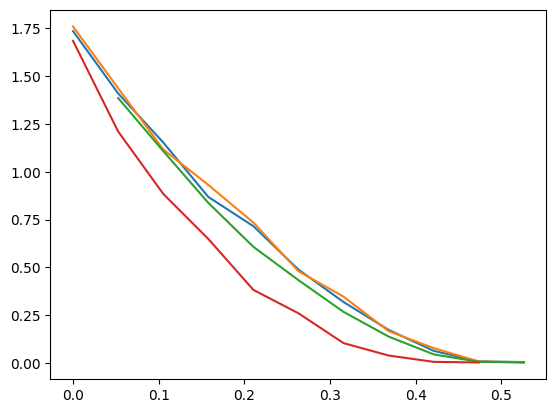

In [80]:
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(utility_error, info_dict[mechanism])
plt.plot(utility_error, aa)
plt.legend(lagends)
plt.grid(visible=True)
plt.show()

In [ ]:
# aa = info_dict["Optimal k-RR"]

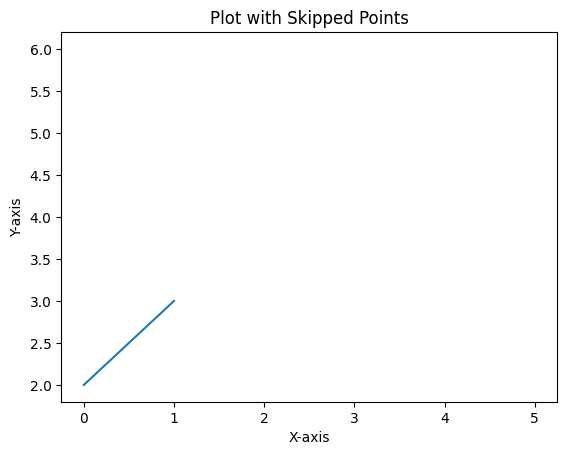

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with some points set to np.nan
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2, 3, np.nan, 5, np.nan, 6])

# Plotting
plt.plot(x, y)
plt.title('Plot with Skipped Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
